In [1]:
from fastai import *
from fastai.vision import *
import torch

In [2]:
print(Config.data_path())
print(Config.model_path())

C:\Users\sepolt\.fastai\data
C:\Users\sepolt\.fastai\models


In [3]:
mnist = untar_data(URLs.MNIST_TINY)
trfm = get_transforms(do_flip=False)

In [4]:
mnist.ls()

[WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/export.pkl'),
 WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/valid')]

In [5]:
(mnist/"train").ls()

[WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/train/3'),
 WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny/train/7')]

In [6]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()
        .label_from_folder()
        .add_test_folder('test')
        .transform(trfm, size=32)
        .databunch()
        .normalize(imagenet_stats))

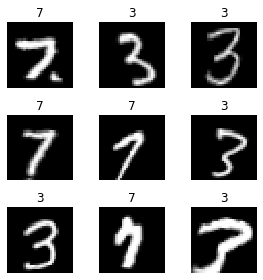

In [7]:
data.show_batch(rows=3, figsize=(4,4))

In [44]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.785829,1.178285,0.709585,00:49
1,0.473795,0.128973,0.967096,00:52
2,0.343417,0.098715,0.972818,00:49


In [45]:
learn.save('mini_train')

In [53]:
Config.model_path()

WindowsPath('C:/Users/sepolt/.fastai/models')

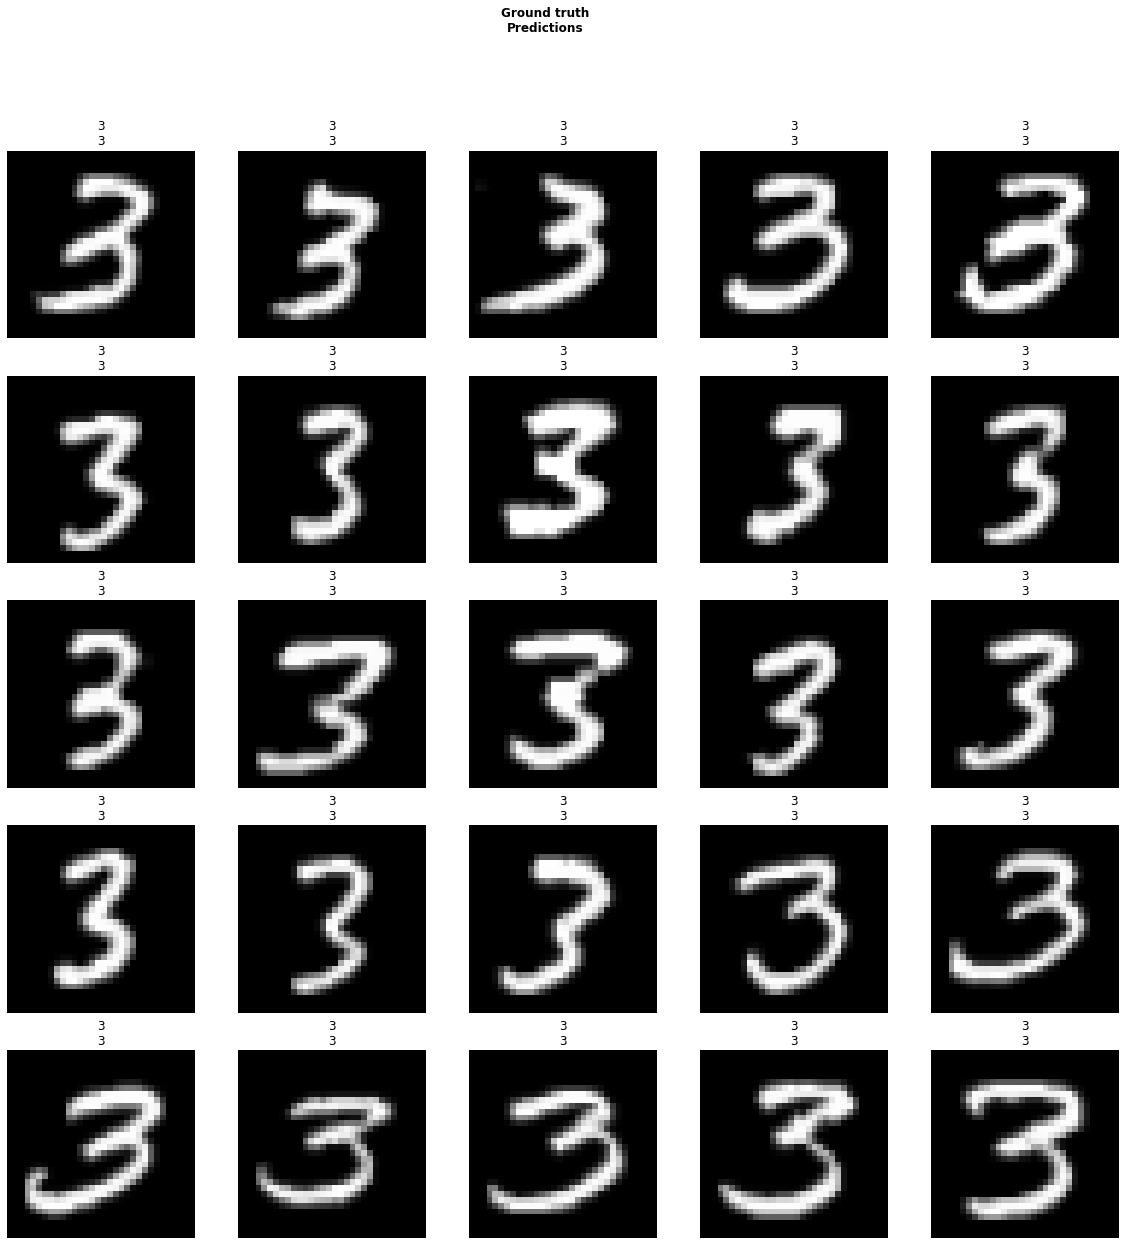

In [54]:
learn.show_results()

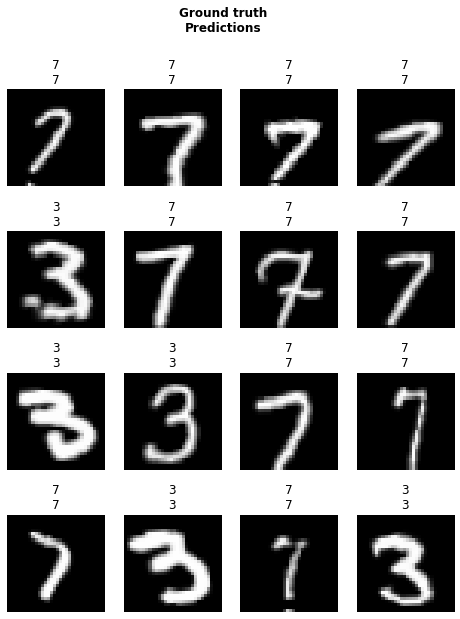

In [61]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))

In [63]:
learn = cnn_learner(data, models.resnet18).load('mini_train')

In [65]:
learn.path

WindowsPath('C:/Users/sepolt/.fastai/data/mnist_tiny')

In [66]:
learn.export()

In [67]:
learn = load_learner(mnist)

In [71]:
# Run inference for one example
img = data.train_ds[0][0]
learn.predict(img)

(Category 3, tensor(0), tensor([1.0000e+00, 3.5738e-06]))

In [75]:
# Run inference for the test set
learn = load_learner(mnist, test=ImageList.from_folder(mnist/'test'))

In [76]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)
preds[:5]

tensor([[9.9990e-01, 9.9788e-05],
        [9.9999e-01, 1.1296e-05],
        [2.2494e-04, 9.9978e-01],
        [9.9999e-01, 8.3275e-06],
        [9.7275e-01, 2.7245e-02]])

In [8]:
# Peak mem metric 
from fastai.callbacks.mem import PeakMemMetric

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=PeakMemMetric)
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,cpu used,peak,gpu used,peak,time
0,0.673695,0.191330,0.939914,0,0,174,1378,00:56
1,0.490988,0.123322,0.951359,0,0,0,36,00:51
2,0.375758,0.134740,0.952790,0,0,0,36,00:50


In [81]:
# GPU experiments
import torch

In [86]:
b = torch.ones((1,1)).cuda

In [83]:
torch.cuda.empty_cache()

In [85]:
torch.cuda.memory_cached()

203423744

In [87]:
del b

In [88]:
# free memory
import gc
gc.collect()
torch.cuda.empty_cache()

In [10]:
learn.purge()

C:\Users\sepolt\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\sepolt\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\sepolt\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\sepolt\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve sou

Learner(data=ImageDataBunch;

Train: LabelList (709 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
3,3,3,3,3
Path: C:\Users\sepolt\.fastai\data\mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
3,3,3,3,3
Path: C:\Users\sepolt\.fastai\data\mnist_tiny;

Test: LabelList (20 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: C:\Users\sepolt\.fastai\data\mnist_tiny, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Ba